In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("jobs.csv")
print(data.head())

   Unnamed: 0                    Job Salary Job Experience Required  \
0           0   Not Disclosed by Recruiter               5 - 10 yrs   
1           1   Not Disclosed by Recruiter                2 - 5 yrs   
2           2   Not Disclosed by Recruiter                0 - 1 yrs   
3           3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4           4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawareho

In [2]:
data = data.drop("Unnamed: 0",axis=1)

In [3]:
data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

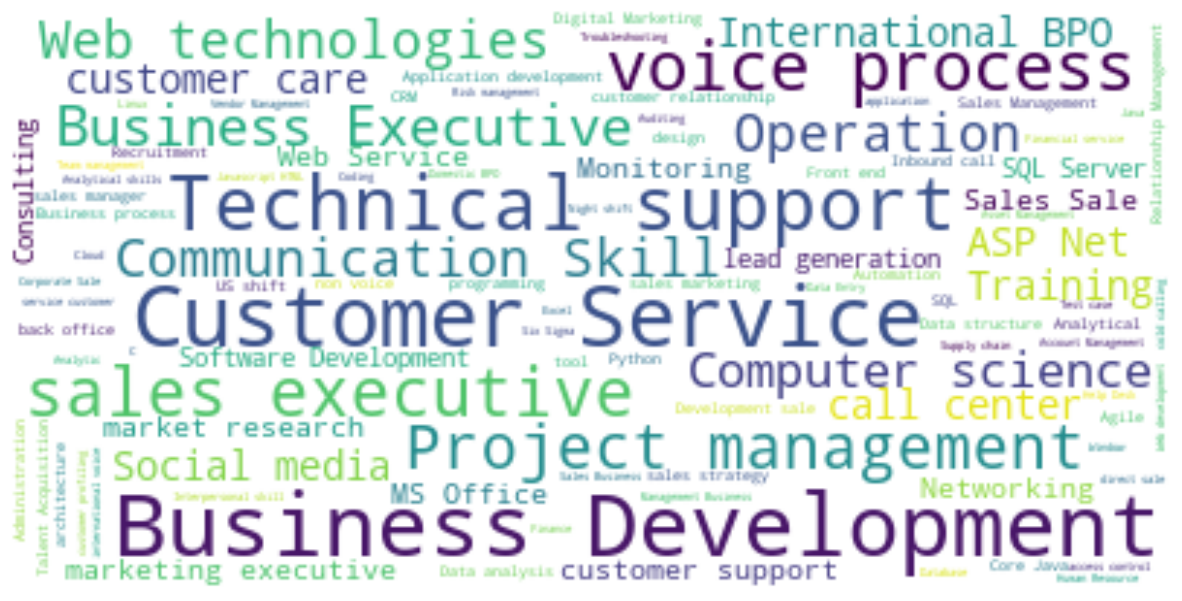

In [4]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

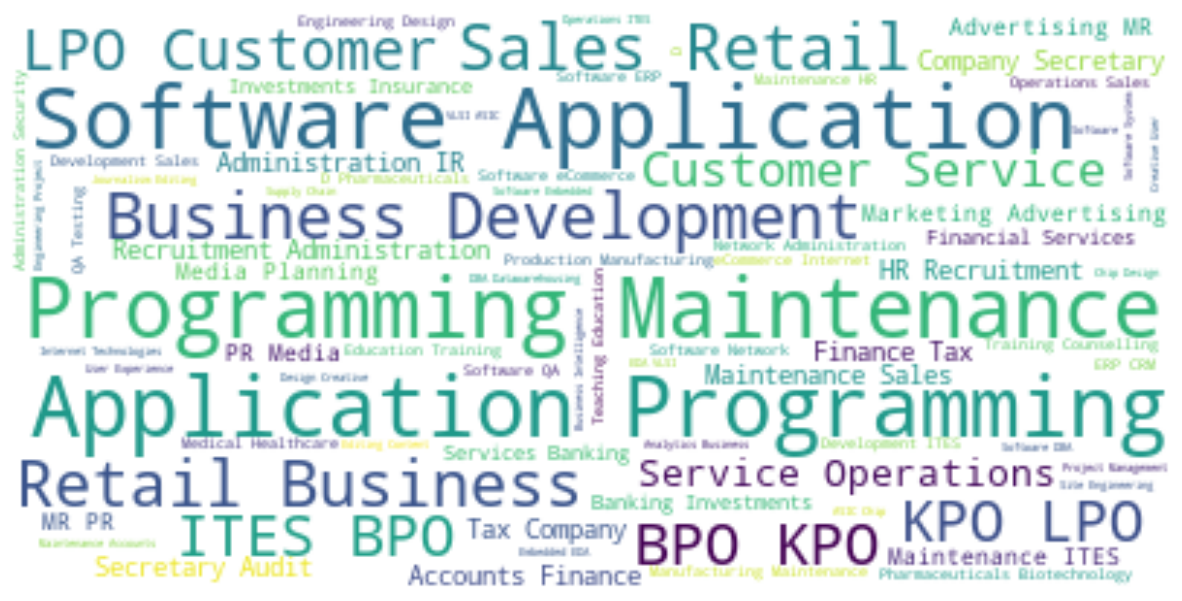

In [5]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


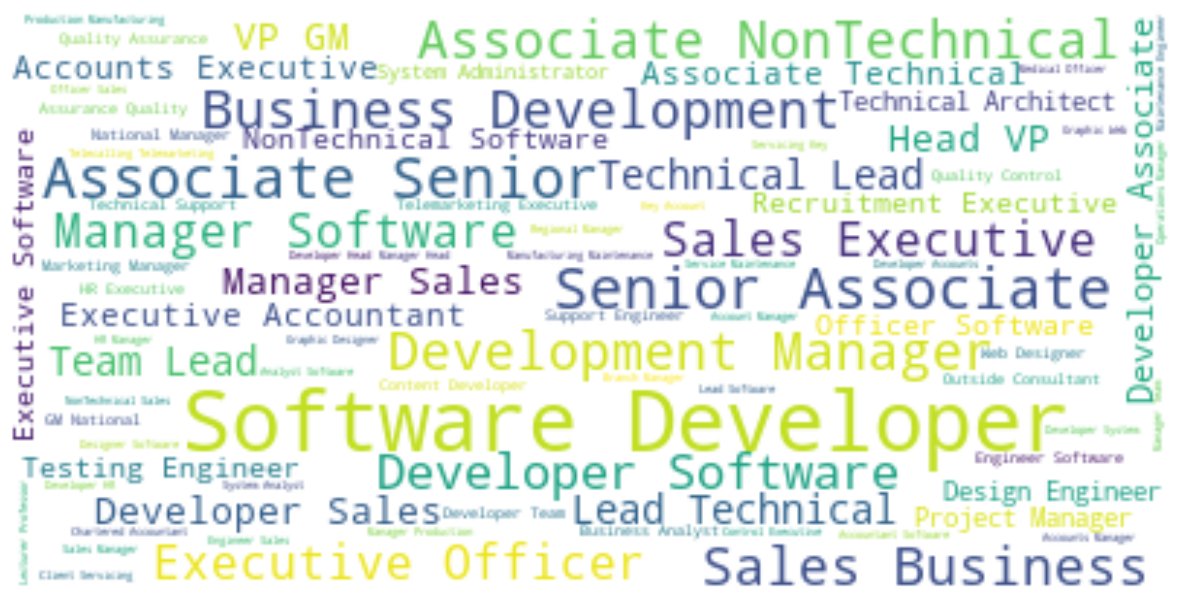

In [16]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
feature = data["Key Skills"].tolist()

In [18]:
print(feature)

[' Media Planning| Digital Media', ' pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology', ' Computer science| Fabrication| Quality check| Intellectual property| Electronics| Support services| Research| Management| Human resource management| Research Executive', ' Technical Support', ' manual testing| test engineering| test cases| web testing| web technologies', ' adobe experience manager| digital| digital marketing| adobe analytics| data analytics| aem| adobe| sitecatalyst', ' channel partners| real estate| negotiation| property| Residential Sales', ' TFS| Azure| Git| VSTS| Docker| DynaTrace| Splunk| AWS', ' Bde', ' technical support| support services| application support| communication skills| voice based process| semi voice| semi voice process', ' secretary| executive assistant| ea', ' website| web analytics| xml| link building| google analytics| case studies| seo| social media| tracking| maintaining', ' 

In [19]:
data["Key Skills"]

0                            Media Planning| Digital Media
1         pre sales| closing| software knowledge| clien...
2         Computer science| Fabrication| Quality check|...
3                                        Technical Support
4         manual testing| test engineering| test cases|...
                               ...                        
27005     Graphics| C++| USB| Project management| SOC| ...
27006     Service delivery| LMS| CRE| Integration servi...
27007        Counselor| Mentor| Trainer| Advisor| Teaching
27008     Security Analysis| Software Development Life ...
27009     Press release| Public relations| Publishing| ...
Name: Key Skills, Length: 27010, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming data["Key Skills"] is a list of strings
feature = data["Key Skills"].tolist()

# Join the list of strings into a single document
all_skills = ' '.join(feature)

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform([all_skills])

# Compute cosine similarity
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print the similarity matrix
print(similarity)

[[1.]]


In [10]:
from sklearn.feature_extraction import text
feature = data["Key Skills"].tolist()
all_skills = ' '.join(feature)
tfidf = text.TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [11]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [28]:
print (indices)

Job Title
Media Planning Executive/Manager                  0
Sales Executive/Officer                           1
R&D Executive                                     2
Technical Support Engineer                        3
Testing Engineer                                  4
                                              ...  
Software Developer                            27005
Operations Manager                            27006
Lecturer/Professor                            27007
Software Developer                            27008
Search Engine Optimisation /SEO Specialist    27009
Length: 27010, dtype: int64


In [30]:
indices.to_csv('indices.csv', header=True)


In [29]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Testing Engineer"))

                              Job Title Job Experience Required  \
401      Social Media Marketing Manager               0 - 1 yrs   
400                  Software Developer               3 - 8 yrs   
399                  Production Manager             10 - 15 yrs   
398  Head/VP/GM/National Manager -Sales               3 - 8 yrs   
397  Sales/Business Development Manager               1 - 3 yrs   

                                            Key Skills  
401   website| facebook| online| Twitter| seo| inte...  
400   Salesforce Developer| sfdc developer| Salesforce  
399   Production Management| Weld Shop| Press Shop|...  
398   Equity| Currency| Mutual Funds| Commodities| ...  
397  ERP| RF| Action plan| Relationship| Software s...  
